In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


**MNIST Hand Writing digit**

Loading MNIST Dataset in Keras

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()


**Displaying the Fourth digit**

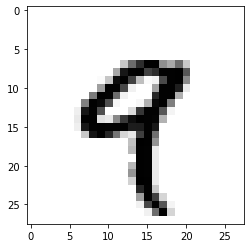

In [ ]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap= plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:

train_images[0].ndim

2

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_labels[0]

5

**The Network Architecture**

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

**The Compilation Step**

In [ ]:
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics = ['accuracy']
                )

**Preparing Image Data**

Normalizing Data

In [ ]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255


In [ ]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

**Preparing the Lables**

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Training**

In [ ]:
network.fit(train_images,train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2561 - accuracy: 0.9250
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1033 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0687 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0500 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0373 - accuracy: 0.9886


**Testing**

In [ ]:
test_loss, test_accuracy  =  network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0887 - accuracy: 0.9746


**Prediction**

In [ ]:
network.predict(test_images)[0]


array([3.5772356e-08, 6.2720047e-09, 4.6054333e-06, 5.0345770e-05,
       1.3615153e-12, 1.4378576e-08, 4.5455135e-14, 9.9993801e-01,
       3.2389089e-08, 7.0126162e-06], dtype=float32)

# MNIST Fashion 

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels),(testing_images, testing_labels)= mnist.load_data()
#normalizing
training_images = training_images/255.0
testing_images = testing_images/255.0
#arcitecture
model = tf.keras.models.Sequential( [ tf.keras.layers.Flatten(), 
                                     tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)]
                                  )
#compilation
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']    
)
#training
model.fit(training_images,training_labels, epochs=5, batch_size=128)
#testing 
model.evaluate(testing_images,testing_labels)




4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5024 - accuracy: 0.8230
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3697 - accuracy: 0.8675
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3314 - accuracy: 0.8799
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3057 - accuracy: 0.8871
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3376 - accuracy: 0.8745


[0.33762601017951965, 0.8744999766349792]